In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=c29b0ee97b78a9e787bd8d8ed82eeb28ce83c46643de4c1d79f1510b453318ba
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import wget
url1="https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
filename=wget.download(url1, "/tmp")
os.path.dirname(os.path.abspath(filename))
print(filename)

/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [9]:
pre_trained_model= InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                               weights=None)
for layer in pre_trained_model.layers:
    layer.trainable=False
#pre_trained_model.summary()
last_layer=pre_trained_model.get_layer("mixed7")
print("last layer output shape", last_layer.output_shape)
last_output=last_layer.output

last layer output shape (None, 7, 7, 768)


In [12]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation="relu")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1, activation="sigmoid")(x)

model=Model(pre_trained_model.input,x)
model.compile(
    optimizer=RMSprop(lr=.0001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)


/tmp/cats_and_dogs_filtered.zip


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [15]:
# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 53s - loss: 0.6932 - accuracy: 0.5075 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/20
100/100 - 18s - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/20
100/100 - 18s - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 4/20
100/100 - 17s - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.5040
Epoch 5/20
100/100 - 17s - loss: 0.6926 - accuracy: 0.5115 - val_loss: 0.6919 - val_accuracy: 0.5070
Epoch 6/20
100/100 - 17s - loss: 0.6921 - accuracy: 0.5255 - val_loss: 0.6916 - val_accuracy: 0.5060
Epoch 7/20
100/100 - 18s - loss: 0.6920 - accuracy: 0.5230 - val_loss: 0.6913 - val_accuracy: 0.5060
Epoch 8/20
100/100 - 17s - loss: 0.6917 - accuracy: 0.5325 - val_loss: 0.6911 - val_accuracy: 0.5050
Epoch 9/20
100/100 - 17s - loss: 0.6911 - accuracy: 0.5410 - val_loss: 0.6910 - val_accuracy: 0.5040
Epoch 10/20
100/100 - 17s - loss: 0.6914 - accuracy: 0.5295 - val_loss: 0.6905 - val_accura

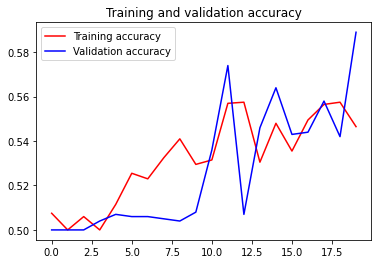

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()